In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
url = "dataset//breast-cancer-wisconsin.data"
columns=['Sample code number','Clump Thickness','Uniformity of Cell Size',
             'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
             'Bare_Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data = pd.read_csv(url, names=columns)
print(data.shape)
data['Class']=data['Class'].replace([2,4],[0,1])
data = data.replace(to_replace = "?", value = np.nan)
print(data.isnull().sum())
data = data.dropna(axis=0,how='any')
data= data.drop('Sample code number',1)
print(data.shape)
data.head(n=3)

(699, 11)
Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare_Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
(683, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0


In [3]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [4]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare_Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
data.Class.value_counts().sort_index()

0    444
1    239
Name: Class, dtype: int64

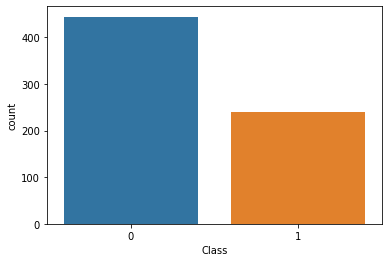

In [6]:
sns.countplot(x='Class', data=data)
title="E:\\COMP551\\project1\\pic\\"
plt.savefig(title + "breast_cancer_class.png")

In [7]:
data.groupby('Class').mean()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,5.974895,5.857741,2.602510


# Corelation between features:


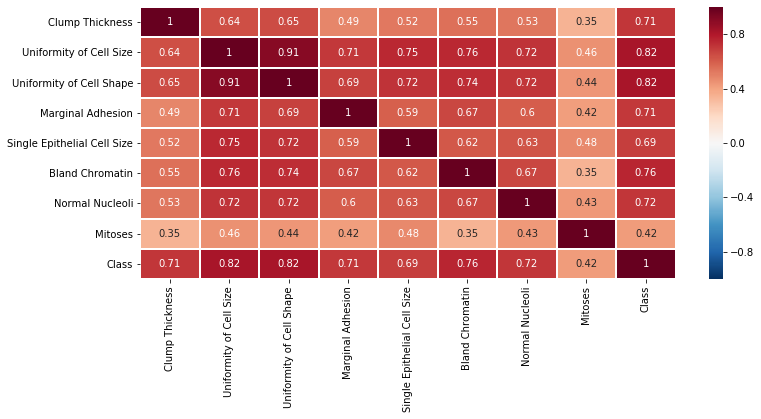

In [8]:
correlation = data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True,linewidths=1, vmin=-1,cmap="RdBu_r")
plt.savefig(title + "breast_cancer_cor.jpg")

In [9]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64